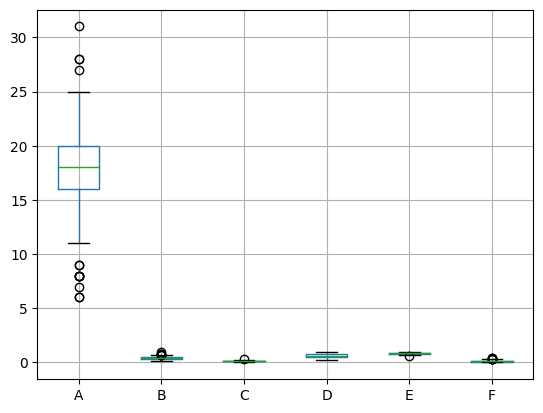

In [2]:
# Importing libraries needed
# Note that keras is generally used for deep learning as well from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import csv
import matplotlib.pyplot as plt
# Read Data and fix seed
# fix random seed for reproducibility
np.random.seed(7)
df = pd.read_csv("Alumni Giving Regression (Edited).csv", delimiter=",")
dd_df_1=df.head()
import seaborn as sns
import pandas as pd
boxplot = pd.DataFrame(df).boxplot()


<Axes: >

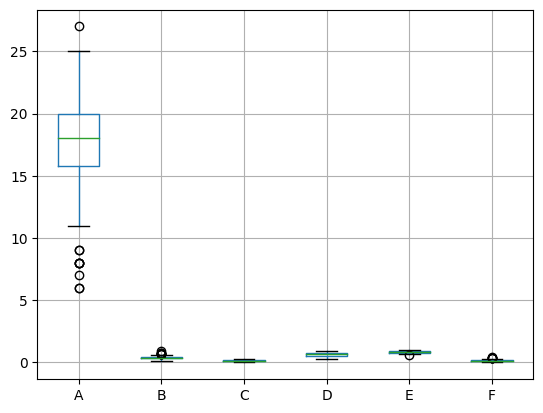

In [3]:
# %%
quantile99 = df.iloc[:,0].quantile(0.99)
df1=df[df.iloc[:,0] < quantile99]
df1.boxplot()


<Axes: >

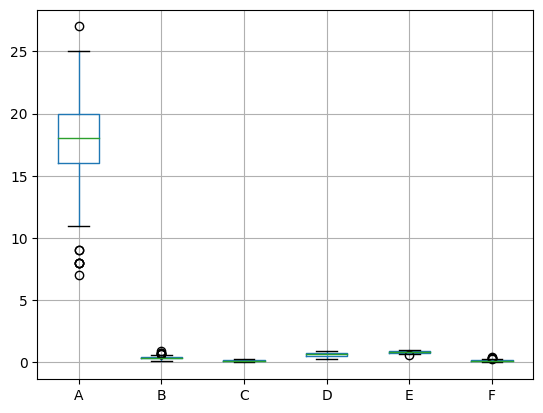

In [4]:
# %%
quantile1 =  df.iloc[:,0].quantile(0.01)
quantile99 = df.iloc[:,0].quantile(0.99)
df2 = df[(df.iloc[:,0] > quantile1) & (df.iloc[:,0] <quantile99)]
df2.boxplot()


In [5]:
# %%
df.dropna()


,A,B,C,D,E,F
0,24,0.42,0.16,0.59,0.81,0.08
1,19,0.49,0.04,0.37,0.69,0.11
2,18,0.24,0.17,0.66,0.87,0.31
3,8,0.74,0.00,0.81,0.88,0.11
4,8,0.95,0.00,0.86,0.92,0.28
...,...,...,...,...,...,...
118,11,0.54,0.03,0.89,0.94,0.29
119,15,0.37,0.22,0.69,0.83,0.13
120,23,0.32,0.19,0.59,0.80,0.12
121,19,0.43,0.06,0.49,0.73,0.13


In [6]:
# Assuming you have already loaded the data into the 'df' DataFrame

# Dropping missing values
df = df.dropna()

# Feature Ranking
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

model3 = RandomForestRegressor()
model3.fit(X, y)

importances = model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking: ")
for f in range(X.shape[1]):
    print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking: 
1. feature (Column index) 0 (0.547426)
2. feature (Column index) 2 (0.163201)
3. feature (Column index) 1 (0.121114)
4. feature (Column index) 3 (0.099430)
5. feature (Column index) 4 (0.068829)


In [8]:

# %%
indices_top3= indices[:3]
print(indices_top3)
dataset=df
df = pd.DataFrame(df)
Y_position = 5
TOP_N_FEATURE = 3
X = dataset.iloc[:, indices_top3]
Y = dataset.iloc[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)
#Model 1 linear regression
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
#print("Regression")
#print("=======")

RMSE_train1 = mean_squared_error(y_train, y_pred_train1)
print("Regression TrainSet: RMSE {}".format(RMSE_train1))
#print("======")
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error (y_test,y_pred1)
print("Regression Testset: RMSE {}".format(RMSE_test1))
#print("====")



[0 2 1]
Regression TrainSet: RMSE 0.003698847883733275
Regression Testset: RMSE 0.005388812554401423
